In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings('ignore')
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('C:/Users/admin/Downloads/diabetes/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
df['weight'].value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [10]:
df['payer_code'].value_counts()

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

In [11]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [12]:
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [13]:
df['max_glu_serum'].isnull().reset_index()

,index,max_glu_serum
0,0,True
1,1,True
2,2,True
3,3,True
4,4,True
...,...,...
101761,101761,True
101762,101762,True
101763,101763,True
101764,101764,True


In [14]:
df['A1Cresult'].isnull().reset_index()

,index,A1Cresult
0,0,True
1,1,True
2,2,True
3,3,True
4,4,True
...,...,...
101761,101761,False
101762,101762,True
101763,101763,True
101764,101764,True


In [15]:
df.drop(['max_glu_serum','A1Cresult'], inplace=True, axis=1)

In [16]:
df.rename(columns={'diabetesMed':'Diabetic'},inplace=True)

In [17]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [18]:
# Replace '?' with NaN in 'race', 'diag_1', 'diag_2', and 'diag_3'
df.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

  Diabetic  count
0      Yes  75351
1       No  22702


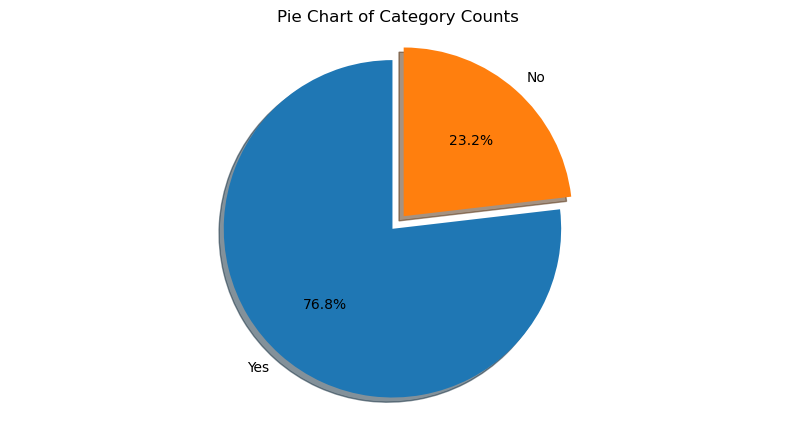

In [19]:
print(df['Diabetic'].value_counts().reset_index())
value_counts = df['Diabetic'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90,explode=[0,0.1],shadow=True)
plt.title('Pie Chart of Category Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# The patient is diabetic: 1 , The patient is not diabetic: 0

In [20]:
df['Diabetic'].replace({'Yes': 1, 'No':0},inplace=True)

Diabetic
1    75351
0    22702
Name: count, dtype: int64


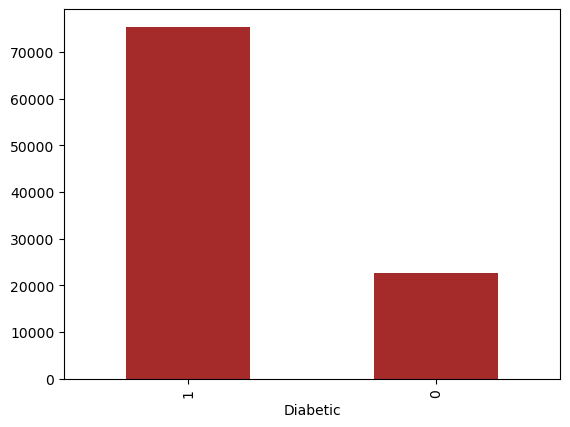

In [21]:
print(df.Diabetic.value_counts())
p=df.Diabetic.value_counts().plot(kind="bar",color='brown')

In [22]:
df['gender'].value_counts().reset_index()

,gender,count
0,Female,52833
1,Male,45219
2,Unknown/Invalid,1


In [23]:
df[df['gender'] == 'Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Diabetic,readmitted
30506,98634858,100695042,Other,Unknown/Invalid,[70-80),3,1,1,1,5,...,No,No,No,No,No,No,No,Ch,1,NO


In [24]:
a = df['gender'] == 'Unknown/Invalid'

df = df[~a]

In [25]:
df['gender'].value_counts()

gender
Female    52833
Male      45219
Name: count, dtype: int64

# Male: 1 , Female: 0

In [26]:
df['gender'].replace({'Male': 1, 'Female':0},inplace=True)

   gender  count
0       0  52833
1       1  45219


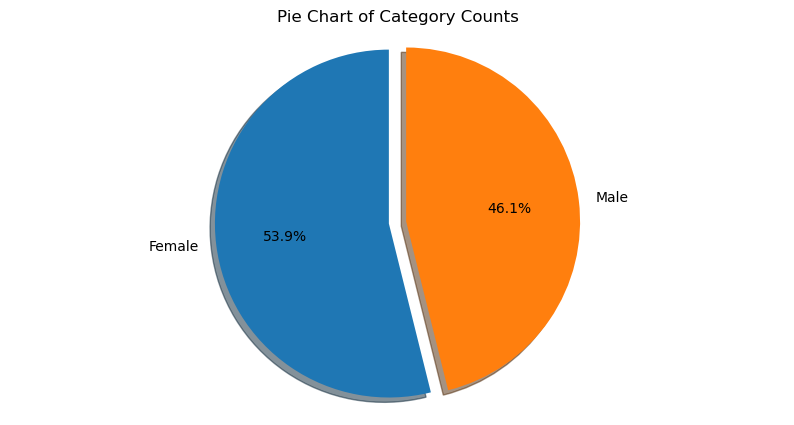

In [27]:
print(df['gender'].value_counts().reset_index())
value_counts = df['gender'].value_counts()

labels = ['Female','Male']

plt.figure(figsize=(10, 5))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90,explode=[0,0.1],shadow=True)
plt.title('Pie Chart of Category Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [28]:
df['readmitted'].value_counts()

readmitted
NO     52337
>30    34649
<30    11066
Name: count, dtype: int64

# No: 0 , >30: 1 , <30: 2

In [29]:
df['readmitted'].replace({'NO': 0, '>30':1, '<30':2},inplace=True)

readmitted
0    52337
1    34649
2    11066
Name: count, dtype: int64


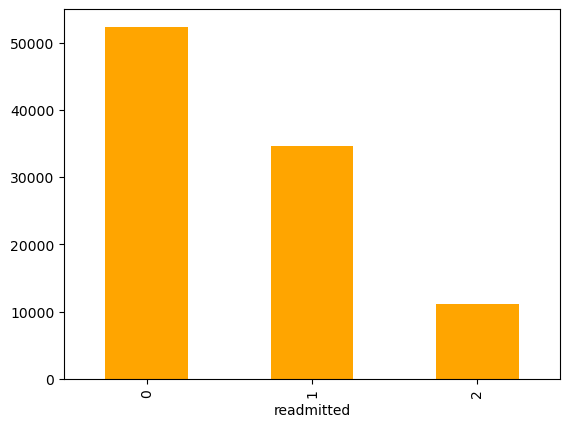

In [30]:
print(df.readmitted.value_counts())
p=df.readmitted.value_counts().plot(kind="bar",color='orange')

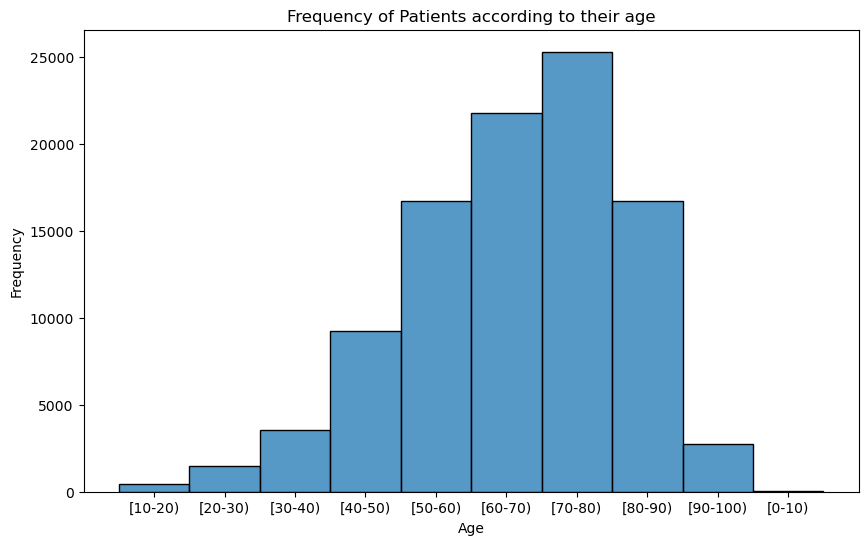

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'])
plt.title('Frequency of Patients according to their age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

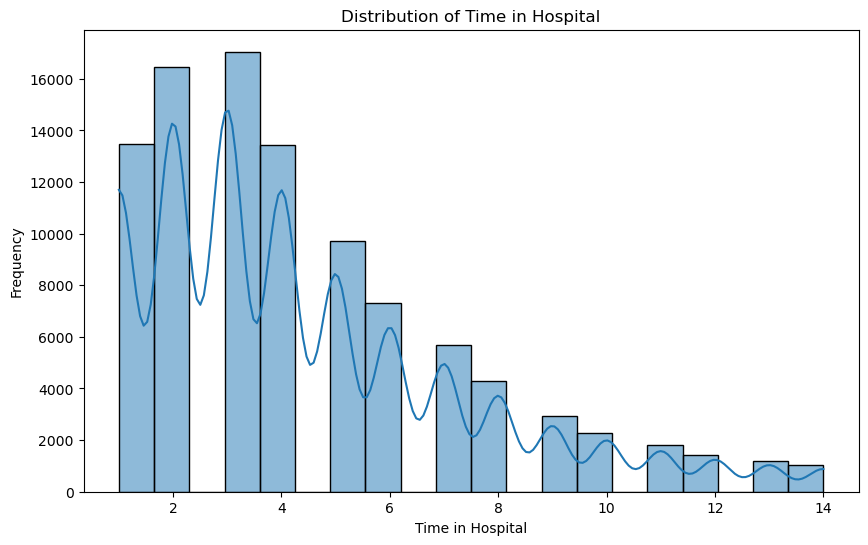

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['time_in_hospital'], bins=20, kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Time in Hospital')
plt.ylabel('Frequency')
plt.show()

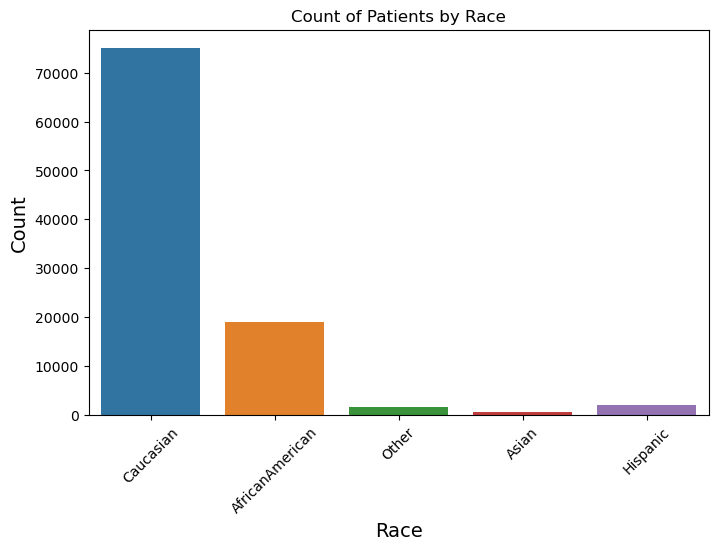

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='race')
plt.title('Count of Patients by Race')
plt.xlabel("Race", fontsize = 14, color = 'black')
plt.ylabel("Count", fontsize = 14, color = 'black')
plt.xticks(rotation=45)
plt.show()

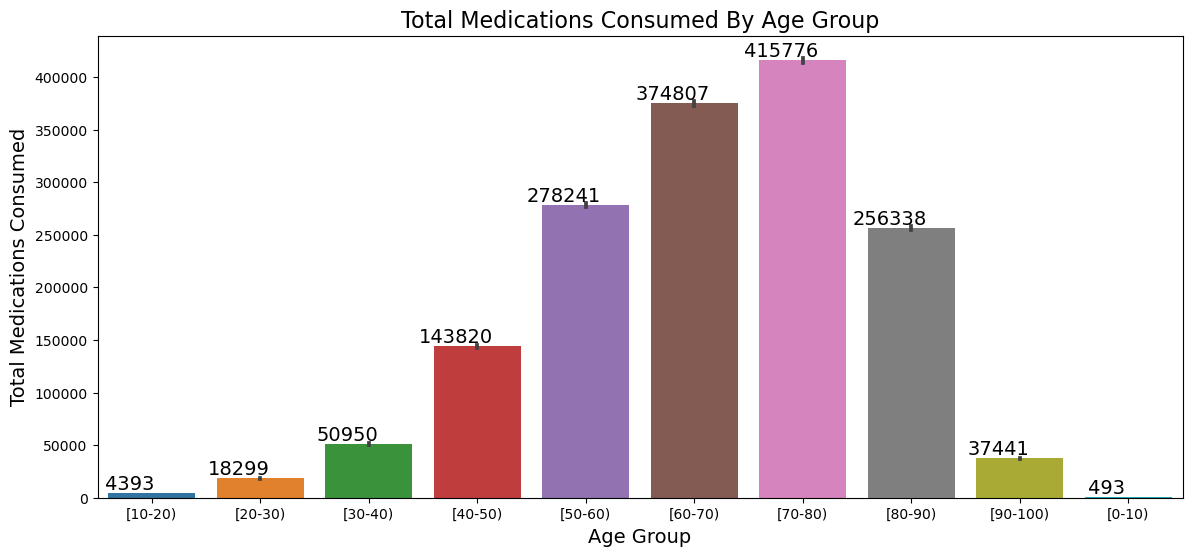

In [34]:
plt.figure(figsize = (14,6))
figx = sns.barplot(x = 'age', y = 'num_medications', estimator = np.sum, data = df)
plt.xlabel("Age Group", fontsize = 14, color = 'black')
plt.ylabel("Total Medications Consumed", fontsize = 14, color = 'black')
plt.title("Total Medications Consumed By Age Group", fontsize = 16, color = 'black')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
plt.show()

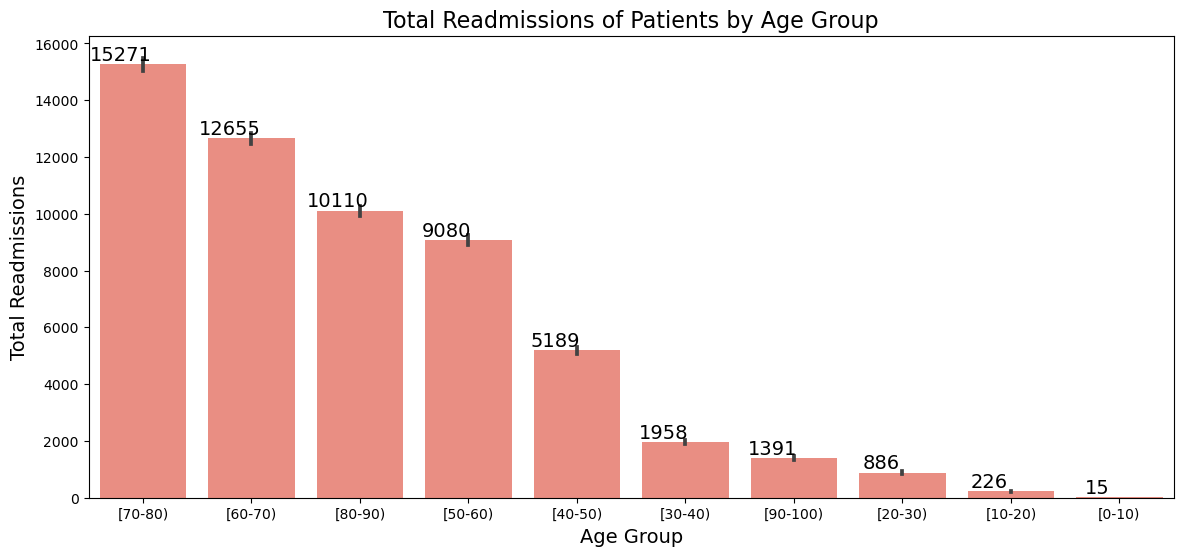

In [35]:
plt.figure(figsize=(14, 6))
figx = sns.barplot(x='age', y='readmitted', estimator=np.sum, data=df, color='salmon',
                   order=df.groupby('age')['readmitted'].sum().sort_values(ascending=False).index)
plt.xlabel("Age Group", fontsize=14, color='black')
plt.ylabel("Total Readmissions", fontsize=14, color='black')
plt.title("Total Readmissions of Patients by Age Group", fontsize=16, color='black')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha='center', 
                  va='bottom', 
                  fontsize=14,
                  color='black')
plt.show()


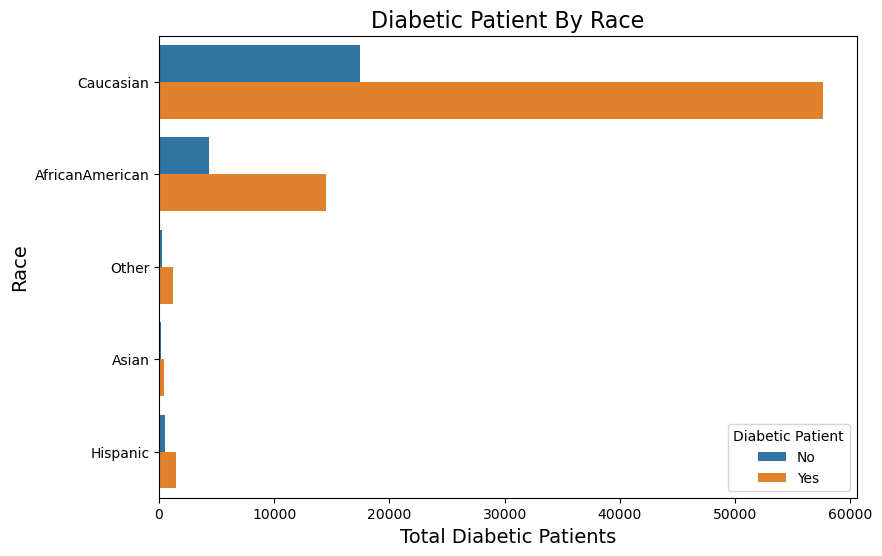

In [36]:
figx = sns.countplot(y = 'race', hue = 'Diabetic', data = df) 
plt.xlabel("Total Diabetic Patients", fontsize = 14, color = 'black')
plt.ylabel("Race", fontsize = 14, color = 'black')
figx.figure.set_size_inches(9, 6)
figx.legend(title = 'Diabetic Patient', labels = ('No', 'Yes'))
figx.axes.set_title('Diabetic Patient By Race', fontsize = 16)
plt.show()

In [37]:
# Remove encounters where 'discharge_disposition_id' indicates expiration
df = df[df['discharge_disposition_id'] != 11]

# Remove encounters where 'discharge_disposition_id' indicates hospice
df = df[df['discharge_disposition_id'] != 13]

# Remove encounters where 'discharge_disposition_id' indicates 'still patient'
df = df[df['discharge_disposition_id'] != 14]

In [38]:
# Convert 'age' column to numeric
df['age'] = df['age'].str.extract(r'(\d+)-').astype(int)

In [39]:
df['age']

1         10
2         20
3         30
4         40
5         50
          ..
101761    70
101762    80
101763    70
101764    80
101765    70
Name: age, Length: 95682, dtype: int32

In [40]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'Diabetic', 'readmitted'],
      dtype='object')

In [121]:
# Feature Selection and target variable
X = df[['gender', 'age','time_in_hospital', 'num_lab_procedures', 'num_procedures',
        'num_medications', 'glipizide', 'glyburide', 'tolbutamide',
        'pioglitazone', 'insulin','glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
        'metformin-pioglitazone', 'change', 'readmitted']]
y = df['Diabetic']

# One-hot encode categorical features
X = pd.get_dummies(X)

In [122]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)  # You can choose the number of principal components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
print("Total explained variance:", np.sum(explained_variance_ratio))

Explained variance ratio: [0.08749891 0.05936477 0.05608035 0.05490561 0.05406847 0.05404141
 0.05384723 0.05271861 0.04781566 0.04582785]
Total explained variance: 0.5661688539434362


In [123]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [124]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(66977, 38) (66977,) (28705, 38) (28705,)


In [125]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=102)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Training accuracy: 0.9979246607044209
Test accuracy: 0.9183765894443476


In [126]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Hyperparameter Tuning

# Tune hyperparameters using techniques like GridSearchCV or RandomizedSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Model Evaluation and Validation
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

# Evaluate the model using appropriate metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy on training set: 0.9268704182032638
Accuracy on test set: 0.9259014109040237
Accuracy: 0.9259014109040237


Text(0.5, 23.52222222222222, 'Predicted label')

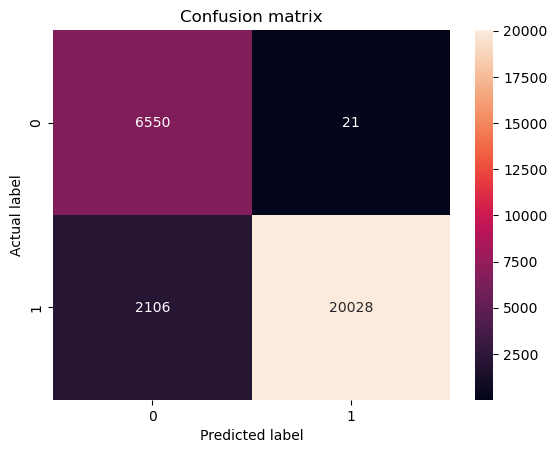

In [127]:
# Plot a labeled confusion matrix with Seaborn
sns.heatmap(confusion_mat, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [128]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

X_train_pred = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
print("Training Data Accuracy: ",training_data_accuracy)

X_test_pred = lr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred, y_test)
print("Testing Data Accuracy: ",testing_data_accuracy)

Training Data Accuracy:  0.9268704182032638
Testing Data Accuracy:  0.9259014109040237


In [129]:
from sklearn import svm
cf = svm.SVC(kernel = 'linear')

cf.fit(X_train, y_train)

X_train_prediction=cf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print("Training Data Accuracy: ",training_data_accuracy)

X_test_prediction=cf.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Testing Data Accuracy: ",testing_data_accuracy)

Training Data Accuracy:  0.9290950624841363
Testing Data Accuracy:  0.9285141961330778


In [130]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,y_train)

X_train_prediction=nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print("Training Data Accuracy: ",training_data_accuracy)

X_test_prediction=nb.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Testing Data Accuracy: ",testing_data_accuracy)

Training Data Accuracy:  0.9290950624841363
Testing Data Accuracy:  0.9285838704058527


In [131]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

X_train_prediction=dt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print("Training Data Accuracy: ",training_data_accuracy)

X_test_prediction=dt.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Testing Data Accuracy: ",testing_data_accuracy)

Training Data Accuracy:  0.9979395912029503
Testing Data Accuracy:  0.8908552516983104


In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)

In [135]:
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1)
print('AUC Curve: ',auc_roc)

Accuracy:  0.9259014109040237
Precision:  0.9989525662127787
Recall:  0.9048522634860395
F1_score:  0.9495768437522225
AUC Curve:  0.9508282014432177
